In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

### PLANTEAMIENTO DE HIPOTESIS

1. "El Athletic Club tiende a ser cada vez menos goleador pero, a la vez, encaja menos goles."

2. "El Athletic Club tiene un desempeño significativamente mejor en partidos en casa en comparación con partidos fuera."

3. "El Athletic Club tiende a remontar partidos cuando está perdiendo al descanso y juega de local". Se puede comparar con la misma situación pero con los partidos de fuera de casa y ver el historico o evloucion de la tasa de remontadas en casa.


## 1. Cargar Dataset


In [3]:
data = pd.read_csv("LaLiga_Matches.csv")
data

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1,1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
2,1995-96,03-09-1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
3,1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
4,1995-96,03-09-1995,Celta,Compostela,0,1,A,0.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...
10878,2023-24,01-10-2023,Almeria,Granada,3,3,D,3.0,0.0,H
10879,2023-24,01-10-2023,Alaves,Osasuna,0,2,A,0.0,1.0,A
10880,2023-24,01-10-2023,Ath Madrid,Cadiz,3,2,H,1.0,2.0,A
10881,2023-24,01-10-2023,Betis,Valencia,3,0,H,1.0,0.0,H


**1.1 Verificar NaNs y corregir datos**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10883 non-null  object 
 1   Date      10883 non-null  object 
 2   HomeTeam  10883 non-null  object 
 3   AwayTeam  10883 non-null  object 
 4   FTHG      10883 non-null  int64  
 5   FTAG      10883 non-null  int64  
 6   FTR       10883 non-null  object 
 7   HTHG      10881 non-null  float64
 8   HTAG      10881 non-null  float64
 9   HTR       10881 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 850.4+ KB


In [5]:
filas_con_missing = data[data.isnull().any(axis=1)]

print(filas_con_missing)

       Season        Date    HomeTeam   AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
136   1995-96  19-11-1995  Ath Bilbao  La Coruna     1     0   H   NaN   NaN   
1472  1998-99  10-01-1999  Valladolid      Betis     0     3   A   NaN   NaN   

      HTR  
136   NaN  
1472  NaN  


**1.2 Procedo a checkear los resultados en internet**

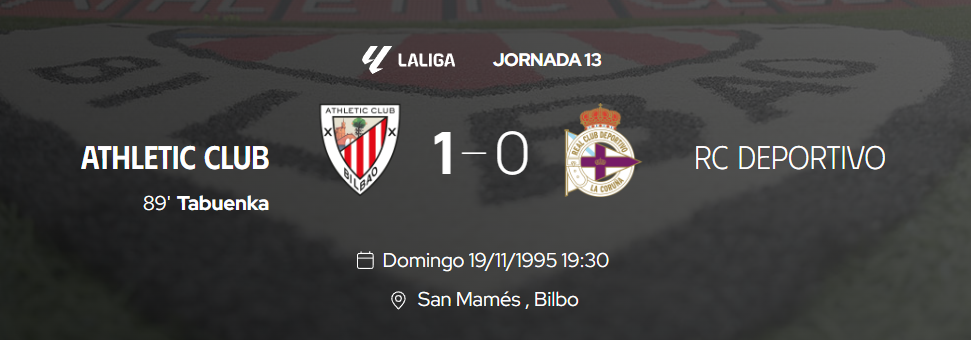

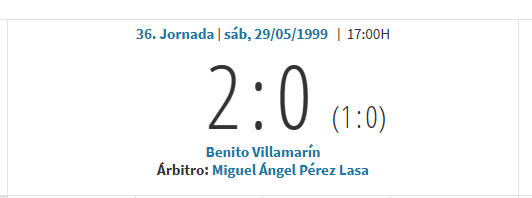

**1.3 Hago los cambios**

In [6]:
data.loc[136, 'HTHG'] = 0
data.loc[136, 'HTAG'] = 0
data.loc[136, 'HTR'] = "D"


data.loc[1472, 'HTHG'] = 1
data.loc[1472, 'HTAG'] = 0
data.loc[1472, 'HTR'] = "H"

filas_corregidas = data.loc[[136,1472]]
filas_corregidas

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
136,1995-96,19-11-1995,Ath Bilbao,La Coruna,1,0,H,0.0,0.0,D
1472,1998-99,10-01-1999,Valladolid,Betis,0,3,A,1.0,0.0,H


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10883 non-null  object 
 1   Date      10883 non-null  object 
 2   HomeTeam  10883 non-null  object 
 3   AwayTeam  10883 non-null  object 
 4   FTHG      10883 non-null  int64  
 5   FTAG      10883 non-null  int64  
 6   FTR       10883 non-null  object 
 7   HTHG      10883 non-null  float64
 8   HTAG      10883 non-null  float64
 9   HTR       10883 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 850.4+ KB


### RESUMEN DE LAS SIGLAS

1. **FTHG** - Number of goals scored by Home Team.
2. **FTAG** - Number of goals scored by Away Team.
3. **FTR** - Full time result.
4. **HTHG** - Number of goals scored by Home Team at Half time.
5. **HTAG** - Number of goals scored by Away Team at Half time.
6. **HTR** - Half time result.
7. **H** - Home Team.
8. **A** - Away Team.
9. **D** - Draw.

## 2. Eliminar las filas de la temporada 23-24
      Está incompleta y la rellenaremos mas adelante con el dataframe completo de esa temporada

In [8]:
to_drop = data[data['Season'].isin(['2023-24'])].index
data.drop(index=to_drop,inplace=True)
data

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1,1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
2,1995-96,03-09-1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
3,1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
4,1995-96,03-09-1995,Celta,Compostela,0,1,A,0.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...
10799,2022-23,04-06-2023,Betis,Valencia,1,1,D,1.0,0.0,H
10800,2022-23,04-06-2023,Celta,Barcelona,2,1,H,1.0,0.0,H
10801,2022-23,04-06-2023,Elche,Cadiz,1,1,D,0.0,1.0,A
10802,2022-23,04-06-2023,Espanol,Almeria,3,3,D,1.0,1.0,D


**2.1. Checkear si no están esas filas con tail() y unique**

In [9]:
print(data["Season"].tail())
print()
print(data["Season"].unique())

10799    2022-23
10800    2022-23
10801    2022-23
10802    2022-23
10803    2022-23
Name: Season, dtype: object

['1995-96' '1996-97' '1997-98' '1998-99' '1999-2000' '2000-01' '2001-02'
 '2002-03' '2003-04' '2004-05' '2005-06' '2006-07' '2007-08' '2008-09'
 '2009-10' '2010-11' '2011-12' '2012-13' '2013-14' '2014-15' '2015-16'
 '2016-17' '2017-18' '2018-19' '2019-20' '2020-21' '2021-22' '2022-23']


## 3. Cargar Dataset temporada 23-24

In [10]:
liga_23_24 = pd.read_csv("SP1_23_24.csv")
liga_23_24

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,SP1,11/08/2023,18:30,Almeria,Vallecano,0,2,A,0,2,...,1.64,0.00,1.85,2.08,1.86,2.07,1.91,2.09,1.86,2.01
1,SP1,11/08/2023,21:00,Sevilla,Valencia,1,2,A,0,0,...,1.61,-0.50,1.94,1.99,1.94,1.98,1.96,2.00,1.93,1.94
2,SP1,12/08/2023,16:00,Sociedad,Girona,1,1,D,1,0,...,1.72,-0.75,2.05,1.75,2.10,1.82,2.14,1.90,2.04,1.82
3,SP1,12/08/2023,18:30,Las Palmas,Mallorca,1,1,D,1,0,...,1.40,-0.25,2.18,1.77,2.20,1.77,2.21,1.79,2.15,1.75
4,SP1,12/08/2023,20:30,Ath Bilbao,Real Madrid,0,2,A,0,2,...,1.89,0.25,1.99,1.94,1.99,1.93,2.10,1.96,1.95,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,25/05/2024,20:00,Real Madrid,Betis,0,0,D,0,0,...,3.43,-2.00,1.85,2.08,1.87,2.04,2.01,2.09,1.94,1.93
376,SP1,26/05/2024,13:00,Getafe,Mallorca,1,2,A,0,0,...,1.58,-0.25,2.04,1.89,2.05,1.88,2.06,1.93,1.97,1.87
377,SP1,26/05/2024,15:15,Celta,Valencia,2,2,D,0,1,...,2.04,-0.50,1.92,2.01,1.92,2.01,1.98,2.01,1.94,1.91
378,SP1,26/05/2024,15:15,Las Palmas,Alaves,1,1,D,0,0,...,1.96,-0.25,2.06,1.87,2.06,1.88,2.06,1.90,2.01,1.84


In [11]:
liga_23_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 105 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(7)
memory usage: 311.8+ KB


**3.1 Limpiar las columnas para la temporada 2023-2024**

In [12]:
liga_23_24_filtered = liga_23_24

liga_23_24_filtered["Season"] = "2023-24"

liga_23_24_filtered = liga_23_24[["Season", "Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "HTHG", "HTAG", "HTR"]]

liga_23_24_filtered

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,2023-24,11/08/2023,Almeria,Vallecano,0,2,A,0,2,A
1,2023-24,11/08/2023,Sevilla,Valencia,1,2,A,0,0,D
2,2023-24,12/08/2023,Sociedad,Girona,1,1,D,1,0,H
3,2023-24,12/08/2023,Las Palmas,Mallorca,1,1,D,1,0,H
4,2023-24,12/08/2023,Ath Bilbao,Real Madrid,0,2,A,0,2,A
...,...,...,...,...,...,...,...,...,...,...
375,2023-24,25/05/2024,Real Madrid,Betis,0,0,D,0,0,D
376,2023-24,26/05/2024,Getafe,Mallorca,1,2,A,0,0,D
377,2023-24,26/05/2024,Celta,Valencia,2,2,D,0,1,A
378,2023-24,26/05/2024,Las Palmas,Alaves,1,1,D,0,0,D


## 4. Unir el dataframe de de la temporada 2023-2024 con el main dataframe

In [13]:
data = pd.concat([data, liga_23_24_filtered], ignore_index=True)
data.tail()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
11179,2023-24,25/05/2024,Real Madrid,Betis,0,0,D,0.0,0.0,D
11180,2023-24,26/05/2024,Getafe,Mallorca,1,2,A,0.0,0.0,D
11181,2023-24,26/05/2024,Celta,Valencia,2,2,D,0.0,1.0,A
11182,2023-24,26/05/2024,Las Palmas,Alaves,1,1,D,0.0,0.0,D
11183,2023-24,26/05/2024,Sevilla,Barcelona,1,2,A,1.0,1.0,D


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11184 entries, 0 to 11183
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11184 non-null  object 
 1   Date      11184 non-null  object 
 2   HomeTeam  11184 non-null  object 
 3   AwayTeam  11184 non-null  object 
 4   FTHG      11184 non-null  int64  
 5   FTAG      11184 non-null  int64  
 6   FTR       11184 non-null  object 
 7   HTHG      11184 non-null  float64
 8   HTAG      11184 non-null  float64
 9   HTR       11184 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 873.9+ KB


**4.1 Renombrar "Ath Bilbao" a "Athletic"**

In [15]:
data = data.replace("Ath Bilbao", "Athletic")

#Verificamos que en el main dataframe no contiene "Ath Bilbao"
print(data.isin(["Ath Bilbao"]).sum())
print(data.isin(["Athletic"]).sum())

Season      0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
dtype: int64
Season        0
Date          0
HomeTeam    555
AwayTeam    555
FTHG          0
FTAG          0
FTR           0
HTHG          0
HTAG          0
HTR           0
dtype: int64


**4.2 Cambiar el nombre de las columnas**

In [16]:
data = data.rename(columns={"FTHG": "GolesLocal", 
                            "FTAG": "GolesVisitante", 
                            "FTR": "Ganador", 
                            "HTHG": "GolesDescansoLocal",
                            "HTAG": "GolesDescansoVisitante",
                            "HTR": "ResultadoDescanso"       
                            })
data

,Season,Date,HomeTeam,AwayTeam,GolesLocal,GolesVisitante,Ganador,GolesDescansoLocal,GolesDescansoVisitante,ResultadoDescanso
0,1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1,1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
2,1995-96,03-09-1995,Athletic,Santander,4,0,H,2.0,0.0,H
3,1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
4,1995-96,03-09-1995,Celta,Compostela,0,1,A,0.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...
11179,2023-24,25/05/2024,Real Madrid,Betis,0,0,D,0.0,0.0,D
11180,2023-24,26/05/2024,Getafe,Mallorca,1,2,A,0.0,0.0,D
11181,2023-24,26/05/2024,Celta,Valencia,2,2,D,0.0,1.0,A
11182,2023-24,26/05/2024,Las Palmas,Alaves,1,1,D,0.0,0.0,D


## 5. Crear nuevas columnas con nuevas métricas

In [17]:
data["GolesPartido"] = data["GolesLocal"] + data["GolesVisitante"]
data["DifGolesDesc"] = data["GolesDescansoLocal"] - data["GolesDescansoVisitante"]
data["DifGolesFinal"] = data["GolesLocal"] - data["GolesVisitante"]

data

,Season,Date,HomeTeam,AwayTeam,GolesLocal,GolesVisitante,Ganador,GolesDescansoLocal,GolesDescansoVisitante,ResultadoDescanso,GolesPartido,DifGolesDesc,DifGolesFinal
0,1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2.0,0.0,H,3,2.0,3
1,1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H,3,3.0,3
2,1995-96,03-09-1995,Athletic,Santander,4,0,H,2.0,0.0,H,4,2.0,4
3,1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D,5,0.0,3
4,1995-96,03-09-1995,Celta,Compostela,0,1,A,0.0,0.0,D,1,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11179,2023-24,25/05/2024,Real Madrid,Betis,0,0,D,0.0,0.0,D,0,0.0,0
11180,2023-24,26/05/2024,Getafe,Mallorca,1,2,A,0.0,0.0,D,3,0.0,-1
11181,2023-24,26/05/2024,Celta,Valencia,2,2,D,0.0,1.0,A,4,-1.0,0
11182,2023-24,26/05/2024,Las Palmas,Alaves,1,1,D,0.0,0.0,D,2,0.0,0


**5.1 Filtrar todos los partidos del Athletic**

In [18]:
partidos_ath = data[(data['HomeTeam'] == 'Athletic') | (data['AwayTeam'] == 'Athletic')]
partidos_ath

,Season,Date,HomeTeam,AwayTeam,GolesLocal,GolesVisitante,Ganador,GolesDescansoLocal,GolesDescansoVisitante,ResultadoDescanso,GolesPartido,DifGolesDesc,DifGolesFinal
2,1995-96,03-09-1995,Athletic,Santander,4,0,H,2.0,0.0,H,4,2.0,4
14,1995-96,09-09-1995,Real Madrid,Athletic,1,2,A,0.0,0.0,D,3,0.0,-1
22,1995-96,16-09-1995,Athletic,Ath Madrid,0,2,A,0.0,1.0,A,2,-1.0,-2
39,1995-96,24-09-1995,Oviedo,Athletic,0,0,D,0.0,0.0,D,0,0.0,0
44,1995-96,30-09-1995,Athletic,Sp Gijon,2,1,H,1.0,0.0,H,3,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,2023-24,03/05/2024,Getafe,Athletic,0,2,A,0.0,1.0,A,2,-1.0,-2
11148,2023-24,11/05/2024,Athletic,Osasuna,2,2,D,0.0,1.0,A,4,-1.0,0
11159,2023-24,15/05/2024,Celta,Athletic,2,1,H,0.0,1.0,A,3,-1.0,1
11165,2023-24,19/05/2024,Athletic,Sevilla,2,0,H,2.0,0.0,H,2,2.0,2


En este punto hay que habría que tener en cuenta **dos tipos de remontadas: la total y la parcial**. Consideramos remontada total a aquella donde se consiguen los 3 puntos, es decir, la victoria. La parcial, en contrapartida, simboliza el empate. Aunque es más interesante fijarnos solo en la victoria, también habria que atender a los puntos conseguidos mediante empate cuando se ha ido perdiendo al descanso, ya que al final del todo, esos punto también ayudan a sumar y a escalar en la tabla. **Yo me centraré en las remontadas totales**, ya que son más significativas (se necesitan anotar más goles que en la remontada parcial y da más puntos), aunque en un aspecto si que utilizaré los datos de la remontada parcial

## 6. Comparacion con otros equipos
Es importante comparar los resultados con los del Athletic, para saber si remontar más partidos, da más puntos históricamente hablando. En mi caso haré la comparación con los 10 equipos que más puntos han conseguido en La Liga. Para eso cargaremos un excel con el histótico de puntos.

In [31]:
puntos = pd.read_excel("clasificacion_historica_la_liga.xlsx")
puntos

,PUESTO,CLUBES,TEMP,JUG,GAN,EMP,PER,G F,G C,PUNTOS,MEDIA,1º,2º,3º,4º
0,1,Real Madrid CF,85.0,2724.0,1618.0,546.0,560.0,5841.0,3099.0,4292.0,1.685389,32.0,23.0,8.0,8.0
1,2,FC Barcelona,85.0,2724.0,1553.0,554.0,617.0,5784.0,3077.0,4172.0,1.628671,24.0,24.0,12.0,12.0
2,3,Athletic Club,85.0,2724.0,1190.0,627.0,907.0,4578.0,3657.0,3305.0,1.322320,8.0,7.0,10.0,5.0
3,4,Valencia CF SAD,81.0,2626.0,1174.0,609.0,843.0,4342.0,3404.0,3340.0,1.349581,6.0,6.0,10.0,11.0
4,5,RCD Espanyol de Barcelona SAD,81.0,2588.0,933.0,597.0,1058.0,3560.0,3834.0,2736.0,1.131955,NaN,NaN,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,CD Condal,1.0,30.0,7.0,8.0,15.0,37.0,57.0,22.0,0.850000,NaN,NaN,NaN,NaN
57,58,Xerez CD SAD,1.0,38.0,8.0,10.0,20.0,38.0,66.0,34.0,0.789474,NaN,NaN,NaN,NaN
58,59,Club Atlético de Tetuán,1.0,30.0,7.0,5.0,18.0,51.0,85.0,19.0,0.750000,NaN,NaN,NaN,NaN
59,60,CyD Leonesa SAD,1.0,30.0,5.0,4.0,21.0,34.0,65.0,14.0,0.550000,NaN,NaN,NaN,NaN


**6.1 Escoger 5 equipos a comparar en base al total de puntos conseguidos**

In [32]:
puntos_nueva = puntos.sort_values(by="PUNTOS", ascending=False).head(10)
puntos_nueva["CLUBES"]

0                   Real Madrid CF
1                     FC Barcelona
5      Club Atlético de Madrid SAD
3                  Valencia CF SAD
2                    Athletic Club
6                   Sevilla FC SAD
4    RCD Espanyol de Barcelona SAD
7      Real Sociedad de Fútbol SAD
8                Real Zaragoza SAD
9          Real Betis Balompié SAD
Name: CLUBES, dtype: object

In [33]:
equivalencias_nombres = {
    "Club Atlético de Madrid SAD": "Ath Madrid",
    "Real Madrid CF": "Real Madrid",
    "FC Barcelona": "Barcelona",
    "Athletic Club": "Athletic",
    "Valencia CF SAD": "Valencia",
    "Sevilla FC SAD": "Sevilla",
    "RCD Espanyol de Barcelona SAD": "Espanol",
    "Real Sociedad de Fútbol SAD": "Sociedad",
    "Real Zaragoza SAD": "Zaragoza",
    "Real Betis Balompié SAD": "Betis"  
}

puntos_nueva["CLUBES"] = puntos_nueva["CLUBES"].replace(equivalencias_nombres)
puntos_nueva

,PUESTO,CLUBES,TEMP,JUG,GAN,EMP,PER,G F,G C,PUNTOS,MEDIA,1º,2º,3º,4º
0,1,Real Madrid,85.0,2724.0,1618.0,546.0,560.0,5841.0,3099.0,4292.0,1.685389,32.0,23.0,8.0,8.0
1,2,Barcelona,85.0,2724.0,1553.0,554.0,617.0,5784.0,3077.0,4172.0,1.628671,24.0,24.0,12.0,12.0
5,6,Ath Madrid,79.0,2576.0,1218.0,589.0,769.0,4464.0,3282.0,3364.0,1.410714,10.0,8.0,15.0,10.0
3,4,Valencia,81.0,2626.0,1174.0,609.0,843.0,4342.0,3404.0,3340.0,1.349581,6.0,6.0,10.0,11.0
2,3,Athletic,85.0,2724.0,1190.0,627.0,907.0,4578.0,3657.0,3305.0,1.322320,8.0,7.0,10.0,5.0
6,7,Sevilla,72.0,2370.0,969.0,522.0,879.0,3611.0,3324.0,2747.0,1.242405,1.0,4.0,4.0,4.0
4,5,Espanol,81.0,2588.0,933.0,597.0,1058.0,3560.0,3834.0,2736.0,1.131955,NaN,NaN,4.0,5.0
7,8,Sociedad,69.0,2264.0,845.0,570.0,849.0,3169.0,3177.0,2509.0,1.184850,2.0,3.0,2.0,5.0
8,9,Zaragoza,58.0,1986.0,698.0,522.0,766.0,2683.0,2847.0,2109.0,1.141490,NaN,1.0,4.0,5.0
9,10,Betis,50.0,1690.0,596.0,431.0,663.0,2121.0,2427.0,1846.0,1.136686,1.0,NaN,2.0,3.0


**6.2 "Funcion" para calcular las estadisticas de remontadas histoticas y por temporada de los 10 primeros equipos**

In [ ]:
teams = list(puntos_nueva["CLUBES"])
team_stats = {}
team_season_data = []

for team in teams:
    team_games = data[(data['HomeTeam'] == team) | (data['AwayTeam'] == team)].copy()
    
    # Determinar si el equipo ganó o empató tras ir perdiendo al descanso
    team_games["TeamWin"] = ((team_games["HomeTeam"] == team) & (team_games["Ganador"] == "H")) | \
                            ((team_games["AwayTeam"] == team) & (team_games["Ganador"] == "A"))

    team_games["TeamDraw"] = ((team_games["HomeTeam"] == team) & (team_games["Ganador"] == "D")) | \
                             ((team_games["AwayTeam"] == team) & (team_games["Ganador"] == "D"))

    team_games["DerrotaDescanso"] = ((team_games["HomeTeam"] == team) & (team_games["ResultadoDescanso"] == "A")) | \
                                    ((team_games["AwayTeam"] == team) & (team_games["ResultadoDescanso"] == "H"))

    # Filtrar todos los partidos donde se remontó (total o parcialmente) tras ir perdiendo al descanso
    total_comebacks = team_games[(team_games["TeamWin"]) & (team_games["DerrotaDescanso"])]
    partial_comebacks = team_games[(team_games["TeamDraw"]) & (team_games["DerrotaDescanso"])]
    total_perdiendo_descanso = team_games[team_games["DerrotaDescanso"]]

    # Remontadas en casa y fuera
    remontadas_casa_total = total_comebacks[total_comebacks["HomeTeam"] == team]
    remontadas_casa_parcial = partial_comebacks[partial_comebacks["HomeTeam"] == team]
    remontadas_fuera_total = total_comebacks[total_comebacks["AwayTeam"] == team]
    remontadas_fuera_parcial = partial_comebacks[partial_comebacks["AwayTeam"] == team]

    # Evitar divisiones por 0
    total_perdiendo_descanso_casa = total_perdiendo_descanso[total_perdiendo_descanso["HomeTeam"] == team]
    total_perdiendo_descanso_fuera = total_perdiendo_descanso[total_perdiendo_descanso["AwayTeam"] == team]

    # Calcular tasas de remontada globales
    total_remontada_rate = round(len(total_comebacks) / len(total_perdiendo_descanso) * 100, 2) if len(total_perdiendo_descanso) > 0 else 0
    partial_remontada_rate = round(len(partial_comebacks) / len(total_perdiendo_descanso) * 100, 2) if len(total_perdiendo_descanso) > 0 else 0
    
    # Calcular tasas de remontada en casa
    total_remontada_casa_rate = round(len(remontadas_casa_total) / len(total_perdiendo_descanso_casa) * 100, 2) if len(total_perdiendo_descanso_casa) > 0 else 0
    partial_remontada_casa_rate = round(len(remontadas_casa_parcial) / len(total_perdiendo_descanso_casa) * 100, 2) if len(total_perdiendo_descanso_casa) > 0 else 0
    
    # Calcular tasas de remontada fuera
    total_remontada_fuera_rate = round(len(remontadas_fuera_total) / len(total_perdiendo_descanso_fuera) * 100, 2) if len(total_perdiendo_descanso_fuera) > 0 else 0
    partial_remontada_fuera_rate = round(len(remontadas_fuera_parcial) / len(total_perdiendo_descanso_fuera) * 100, 2) if len(total_perdiendo_descanso_fuera) > 0 else 0

    # Guardar resultados en diccionario global
    team_stats[team] = {
        "Total_Remontada_Rate": total_remontada_rate,
        "Partial_Remontada_Rate": partial_remontada_rate,
        "Total_Remontada_Casa_Rate": total_remontada_casa_rate,
        "Partial_Remontada_Casa_Rate": partial_remontada_casa_rate,
        "Total_Remontada_Fuera_Rate": total_remontada_fuera_rate,
        "Partial_Remontada_Fuera_Rate": partial_remontada_fuera_rate
    }

    # Guardar datos de remontadas por temporada
    remontadas_por_temporada = total_comebacks.groupby("Season").size().rename("Total_Remontadas")
    total_losing_at_ht = total_perdiendo_descanso.groupby("Season").size().rename("Total_Perdidos_HT")

    # Remontadas en casa y fuera por temporada
    remontadas_casa_total_season = remontadas_casa_total.groupby("Season").size().rename("Total_Remontadas_Casa")
    remontadas_fuera_total_season = remontadas_fuera_total.groupby("Season").size().rename("Total_Remontadas_Fuera")

    # Total de partidos perdiendo al descanso en casa y fuera por temporada
    perdiendo_casa_season = total_perdiendo_descanso_casa.groupby("Season").size().rename("Total_Perdidos_HT_Casa")
    perdiendo_fuera_season = total_perdiendo_descanso_fuera.groupby("Season").size().rename("Total_Perdidos_HT_Fuera")

    season_stats = pd.concat([
    remontadas_por_temporada, total_losing_at_ht,
    remontadas_casa_total_season, perdiendo_casa_season,
    remontadas_fuera_total_season, perdiendo_fuera_season
    ], axis=1)

    season_stats["Team"] = team

    # Calcular tasas de remontada por temporada
    season_stats["Remontada_Rate"] = round((season_stats["Total_Remontadas"] / season_stats["Total_Perdidos_HT"]) * 100, 2)
    season_stats["Remontada_Casa_Rate"] = round((season_stats["Total_Remontadas_Casa"] / season_stats["Total_Perdidos_HT_Casa"]) * 100, 2)
    season_stats["Remontada_Fuera_Rate"] = round((season_stats["Total_Remontadas_Fuera"] / season_stats["Total_Perdidos_HT_Fuera"]) * 100, 2)

    # # Reemplazar NaN con "Sin remontadas"
    season_stats = season_stats.fillna(0)

    # Guardar en la lista para el DataFrame final
    team_season_data.append(season_stats)

**6.3 Estadisticas globales de remontadas de cada equipo**

In [35]:
team_global_stats = pd.DataFrame.from_dict(team_stats, orient="index").sort_values(by="Total_Remontada_Rate", ascending=False)
team_global_stats["PUNTOS"] = puntos_nueva.set_index("CLUBES")["PUNTOS"]
team_global_stats

,Total_Remontada_Rate,Partial_Remontada_Rate,Total_Remontada_Casa_Rate,Partial_Remontada_Casa_Rate,Total_Remontada_Fuera_Rate,Partial_Remontada_Fuera_Rate,PUNTOS
Real Madrid,21.58,20.00,35.29,19.12,13.93,20.49,4292.0
Barcelona,19.77,23.16,18.97,22.41,20.17,23.53,4172.0
Athletic,10.03,16.50,16.67,17.46,5.46,15.85,3305.0
Ath Madrid,9.43,18.87,16.00,24.00,5.84,16.06,3364.0
Zaragoza,8.91,15.35,15.58,19.48,4.80,12.80,2109.0
Valencia,8.71,23.11,13.79,26.44,6.21,21.47,3340.0
Betis,8.24,15.29,8.08,22.22,8.33,10.90,1846.0
Sociedad,7.95,21.21,15.15,28.28,3.64,16.97,2509.0
Sevilla,7.76,17.55,11.24,19.10,5.77,16.67,2747.0
Espanol,7.19,16.99,12.30,20.49,3.80,14.67,2736.0


**6.4 Estadisticas por temporada de remontadas de cada equipo**

In [36]:
team_season_stats = pd.concat(team_season_data).reset_index()
team_season_stats

,Season,Total_Remontadas,Total_Perdidos_HT,Total_Remontadas_Casa,Total_Perdidos_HT_Casa,Total_Remontadas_Fuera,Total_Perdidos_HT_Fuera,Team,Remontada_Rate,Remontada_Casa_Rate,Remontada_Fuera_Rate
0,1996-97,3.0,6,2.0,2.0,1.0,4,Real Madrid,50.00,100.00,25.00
1,1998-99,2.0,11,1.0,2.0,1.0,9,Real Madrid,18.18,50.00,11.11
2,1999-2000,2.0,12,1.0,6.0,1.0,6,Real Madrid,16.67,16.67,16.67
3,2001-02,1.0,7,0.0,0.0,1.0,7,Real Madrid,14.29,0.00,14.29
4,2002-03,3.0,9,2.0,3.0,1.0,6,Real Madrid,33.33,66.67,16.67
...,...,...,...,...,...,...,...,...,...,...,...
258,2012-13,0.0,11,0.0,4.0,0.0,7,Betis,0.00,0.00,0.00
259,2013-14,0.0,16,0.0,7.0,0.0,9,Betis,0.00,0.00,0.00
260,2017-18,0.0,10,0.0,5.0,0.0,5,Betis,0.00,0.00,0.00
261,2019-20,0.0,12,0.0,4.0,0.0,8,Betis,0.00,0.00,0.00


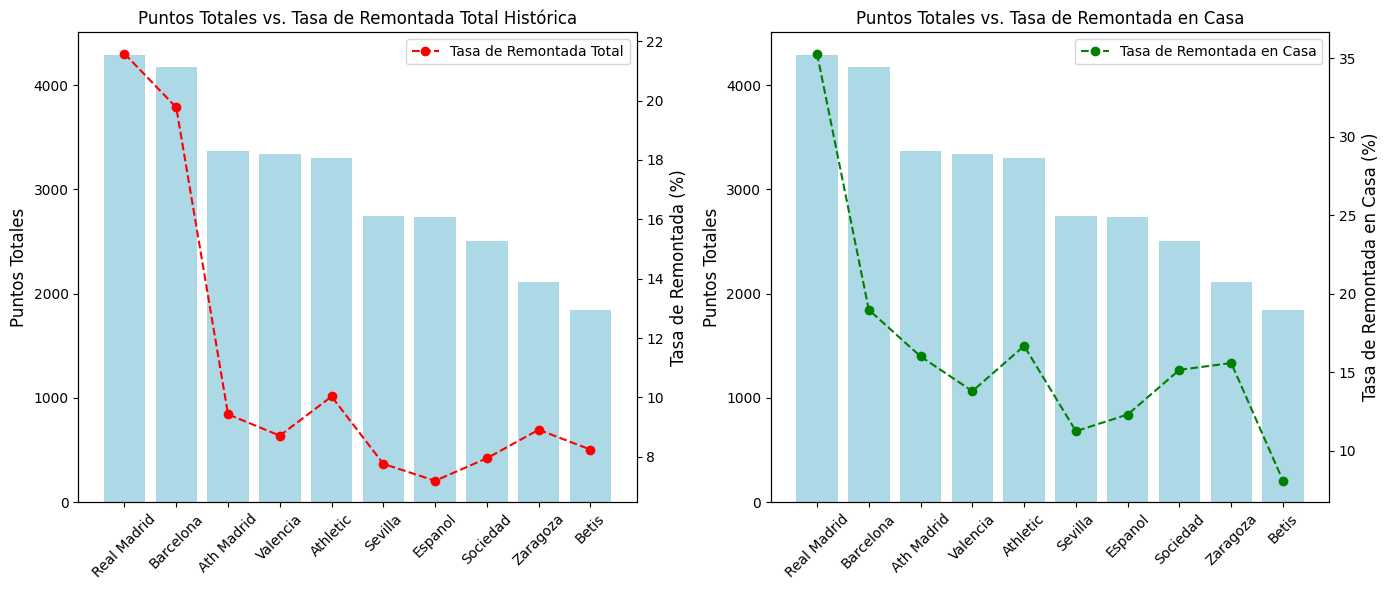

In [37]:
# Ordenar el DataFrame por los puntos (de mayor a menor)
team_global_stats_sorted = team_global_stats.sort_values(by="PUNTOS", ascending=False)

# Configurar la figura
fig, axs = plt.subplots(1, 2, figsize=(14, 6)) 

# Gráfico 1: Puntos históricos vs. Tasa de remontada total
axs[0].bar(team_global_stats_sorted.index, team_global_stats_sorted["PUNTOS"], color="lightblue", label="Puntos Totales")
axs[0].set_ylabel("Puntos Totales", fontsize=12)
axs[0].tick_params(axis="x", rotation=45)

ax2 = axs[0].twinx()
ax2.plot(team_global_stats_sorted.index, team_global_stats_sorted["Total_Remontada_Rate"], color="red", marker="o", linestyle="--", label="Tasa de Remontada Total")
ax2.set_ylabel("Tasa de Remontada (%)", fontsize=12)
ax2.legend(loc="upper right")

axs[0].set_title("Puntos Totales vs. Tasa de Remontada Total Histórica")

# Gráfico 2: Puntos históricos vs. Tasa de remontada en casa
axs[1].bar(team_global_stats_sorted.index, team_global_stats_sorted["PUNTOS"], color="lightblue", label="Puntos Totales")
axs[1].set_ylabel("Puntos Totales", fontsize=12)
axs[1].tick_params(axis="x", rotation=45)

ax3 = axs[1].twinx()
ax3.plot(team_global_stats_sorted.index, team_global_stats_sorted["Total_Remontada_Casa_Rate"], color="green", marker="o", linestyle="--", label="Tasa de Remontada en Casa")
ax3.set_ylabel("Tasa de Remontada en Casa (%)", fontsize=12)
ax3.legend(loc="upper right")

axs[1].set_title("Puntos Totales vs. Tasa de Remontada en Casa")

# Ajustar el diseño para que no se sobrepongan las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### Se trata de un gráfico combinado (bar + line), con dos ejes Y (doble eje) en cada subgráfico

1. **Puntos Totales vs. Tasa de Remontada Total (izquierda)**

Aquí vemos que los equipos con más puntos históricos (Real Madrid, Barcelona, Athletic) tienen, en general, una mayor tasa de remontadas.Sin embargo, hay una caída pronunciada en la tasa de remontada a partir del Athletic, lo que indica que no siempre hay una relación proporcional entre la cantidad de puntos y la capacidad de remontar. Equipos con menos puntos, como Zaragoza o Valencia, tienen una tasa de remontada relativamente estable pero menor que la de los líderes.

2. **Puntos Totales vs. Tasa de Remontada en Casa (derecha)**

Aquí se observa un comportamiento más irregular en la tasa de remontadas en casa.
Algunos equipos como Real Sociedad tienen un pico de remontadas en casa a pesar de no estar en la cima de puntos históricos.
La tasa de remontada en casa varía más que la total, lo que sugiere que el factor local puede influir en la capacidad de remontar.

3. **¿Confirma el gráfico mi hipótesis?**

El Athletic tiene una tasa de remontada en casa relativamente alta, pero no es la más alta en comparación con otros equipos.
Si bien los equipos con más puntos tienden a tener tasas de remontada más altas en general, la variabilidad en la gráfica sugiere que otros equipos también remontan mucho en casa (por ejemplo, la Real Sociedad tiene un pico alto).
Para afirmar la hipótesis con más certeza, habría que comparar la tasa de remontadas del Athletic en casa vs. fuera de casa, en lugar de compararlo con otros equipos.

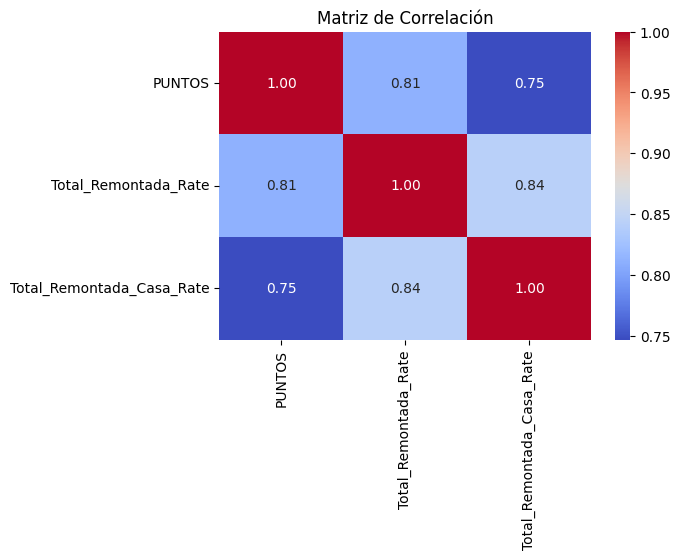

In [48]:
correlation_table = team_global_stats[["PUNTOS", "Total_Remontada_Rate", "Total_Remontada_Casa_Rate"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_table, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

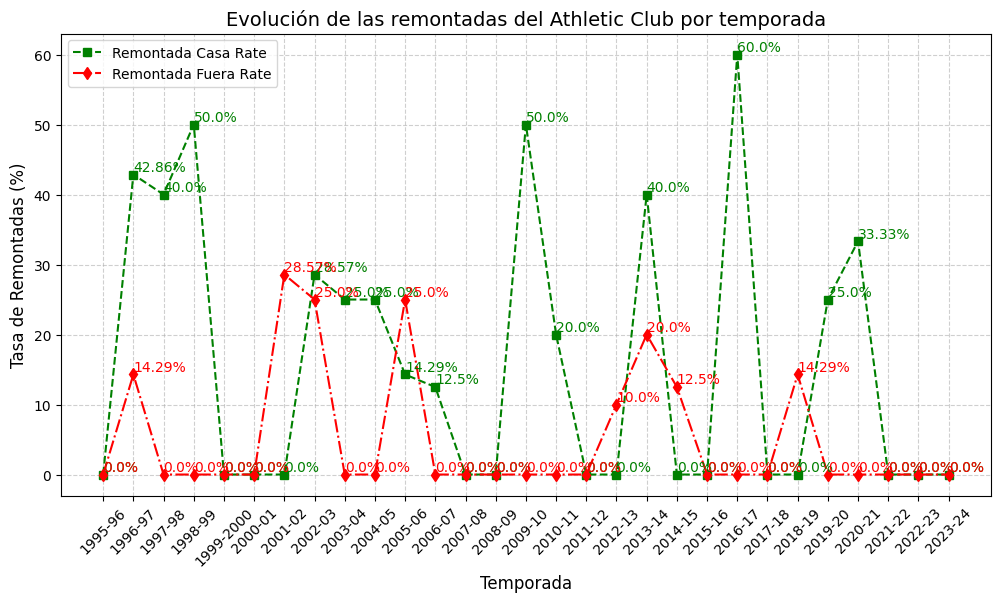

In [38]:
# Convertir la columna "Season" a valores numéricos para ordenar
athletic_season_stats = team_season_stats[team_season_stats["Team"] == "Athletic"].copy()
athletic_season_stats["Season_numeric"] = athletic_season_stats["Season"].str[:4].astype(int)

# Ordenar el DataFrame por la nueva columna
athletic_season_stats = athletic_season_stats.sort_values(by="Season_numeric")

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar las líneas con los datos ordenados
# plt.plot(athletic_season_stats["Season"], athletic_season_stats["Remontada_Rate"], marker='o', linestyle='-', label="Total Remontada Rate", color="blue")
plt.plot(athletic_season_stats["Season"], athletic_season_stats["Remontada_Casa_Rate"], marker='s', linestyle='--', label="Remontada Casa Rate", color="green")
plt.plot(athletic_season_stats["Season"], athletic_season_stats["Remontada_Fuera_Rate"], marker='d', linestyle='-.', label="Remontada Fuera Rate", color="red")

# Añadir etiquetas con los valores
# for i, txt in enumerate(athletic_season_stats["Remontada_Rate"]):
#     plt.text(athletic_season_stats["Season"].iloc[i], athletic_season_stats["Remontada_Rate"].iloc[i] + 0.5, f"{txt}%", fontsize=10, color="blue")

for i, txt in enumerate(athletic_season_stats["Remontada_Casa_Rate"]):
    plt.text(athletic_season_stats["Season"].iloc[i], athletic_season_stats["Remontada_Casa_Rate"].iloc[i] + 0.5, f"{txt}%", fontsize=10, color="green")

for i, txt in enumerate(athletic_season_stats["Remontada_Fuera_Rate"]):
    plt.text(athletic_season_stats["Season"].iloc[i], athletic_season_stats["Remontada_Fuera_Rate"].iloc[i] + 0.5, f"{txt}%", fontsize=10, color="red")

# Personalizar el gráfico
plt.title("Evolución de las remontadas del Athletic Club por temporada", fontsize=14)
plt.xlabel("Temporada", fontsize=12)
plt.ylabel("Tasa de Remontadas (%)", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Mostrar el gráfico con temporadas en orden
plt.xticks(rotation=45)
plt.show()


Interpretación del gráfico
📌 Hipótesis: El Athletic Club tiende a remontar partidos cuando está perdiendo al descanso y juega de local.

✅ Evidencia a favor:

La línea verde (remontadas en casa) es más alta que la roja (fuera) en la mayoría de temporadas donde se han registrado remontadas.

Hay picos importantes de remontadas en casa en varias temporadas (ej: 1996-97, 2002-03, 2013-14, 2019-20).

En varias temporadas recientes (2016 en adelante), la tasa de remontadas fuera de casa es cero, lo que refuerza la idea de que el Athletic tiene más tendencia a remontar en casa.

❌ Aspectos a considerar:

Hay muchas temporadas donde la tasa de remontadas (en casa y fuera) es cero, lo que podría indicar que en algunos años el equipo no tuvo remontadas o que los datos son limitados.

Hay algunas temporadas donde las remontadas fuera de casa fueron similares o incluso superiores a las de casa (ej: 2001-02, 2003-04), aunque son excepciones.

La variabilidad es alta, lo que sugiere que las remontadas no son una constante, sino que dependen de factores externos como el entrenador, el estilo de juego o el contexto de la temporada.

Conclusión
📊 La hipótesis parece sostenerse en términos generales, ya que las remontadas en casa han sido más frecuentes y con picos más altos que las de fuera. Sin embargo, hay variabilidad entre temporadas, lo que indica que otros factores pueden influir en estas tendencias.

C:\Users\ibai\AppData\Local\Temp\ipykernel_7904\1188715227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athletic_data["Remontada_Casa"] = (athletic_data["HomeTeam"] == "Athletic") & \
C:\Users\ibai\AppData\Local\Temp\ipykernel_7904\1188715227.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athletic_data["Remontada_Fuera"] = (athletic_data["AwayTeam"] == "Athletic") & \
C:\Users\ibai\AppData\Local\Temp\ipykernel_7904\1188715227.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy

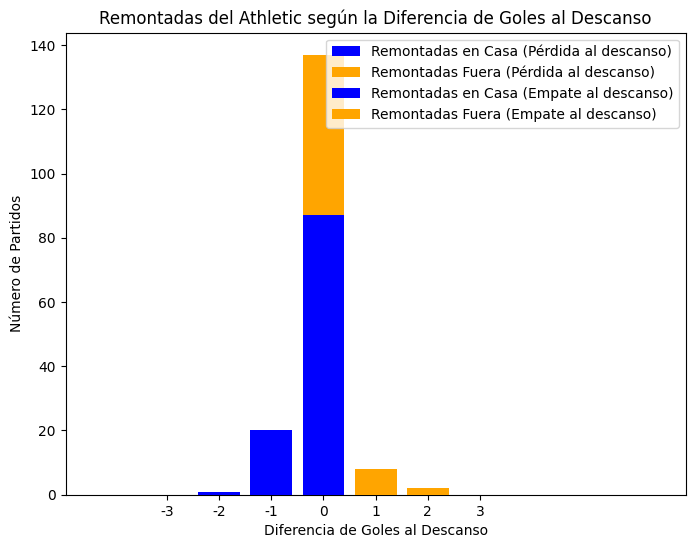

In [39]:
# # Filtrar solo los partidos del Athletic
athletic_data = data[(data["HomeTeam"] == "Athletic") | (data["AwayTeam"] == "Athletic")]

# # # Remontadas en casa: Athletic es local, pierde al descanso (A) y gana al final (H)
athletic_data["Remontada_Casa"] = (athletic_data["HomeTeam"] == "Athletic") & \
                                  (athletic_data["ResultadoDescanso"] == "A") & \
                                  (athletic_data["Ganador"] == "H")

# # # Remontadas fuera: Athletic es visitante, pierde al descanso (H) y gana al final (A)
athletic_data["Remontada_Fuera"] = (athletic_data["AwayTeam"] == "Athletic") & \
                                   (athletic_data["ResultadoDescanso"] == "H") & \
                                   (athletic_data["Ganador"] == "A")

athletic_data["Remontada_Tras_Empate_Casa"] = (athletic_data["HomeTeam"] == "Athletic") & \
                                         (athletic_data["ResultadoDescanso"] == "D") & \
                                         (athletic_data["Ganador"] == "H")

athletic_data["Remontada_Tras_Empate_Fuera"] = (athletic_data["AwayTeam"] == "Athletic") & \
                                         (athletic_data["ResultadoDescanso"] == "D") & \
                                         (athletic_data["Ganador"] == "A")

# # # # Contamos remontadas en casa y fuera según la diferencia de goles al descanso
grouped_casa = athletic_data.groupby("DifGolesDesc")["Remontada_Casa"].sum().astype(int)
grouped_fuera = athletic_data.groupby("DifGolesDesc")["Remontada_Fuera"].sum().astype(int)
grouped_empate_casa = athletic_data.groupby("DifGolesDesc")["Remontada_Tras_Empate_Casa"].sum().astype(int)
grouped_empate_fuera = athletic_data.groupby("DifGolesDesc")["Remontada_Tras_Empate_Fuera"].sum().astype(int)

# # # # Gráfico
fig, ax = plt.subplots(figsize=(8, 6))
# ax.bar(grouped_casa.index, grouped_casa, color='blue', label='Remontadas en Casa')
# ax.bar(grouped_fuera.index, grouped_fuera, bottom=grouped_casa, color='orange', label='Remontadas Fuera')
# ax.bar(grouped_empate_casa.index, grouped_empate_casa, bottom=grouped_casa, color='blue', label='Remontadas EN CASA tras empate al descanso')
# ax.bar(grouped_empate_fuera.index, grouped_empate_fuera, bottom=grouped_casa, color='orange', label='Remontadas FUERA tras empate al descanso')
ax.bar(grouped_casa.index, grouped_casa, color='blue', label='Remontadas en Casa (Pérdida al descanso)', zorder=5)

# Remontadas Fuera (cuando va perdiendo al descanso)
ax.bar(grouped_fuera.index, grouped_fuera, bottom=grouped_casa, color='orange', label='Remontadas Fuera (Pérdida al descanso)', zorder=4)

# Remontadas en Casa tras empate al descanso
ax.bar(grouped_empate_casa.index, grouped_empate_casa, bottom=grouped_casa + grouped_fuera, color='blue', label='Remontadas en Casa (Empate al descanso)', zorder=3)

# Remontadas Fuera tras empate al descanso
ax.bar(grouped_empate_fuera.index, grouped_empate_fuera, bottom=grouped_casa + grouped_fuera + grouped_empate_casa, color='orange', label='Remontadas Fuera (Empate al descanso)', zorder=2)

ax.set_xlabel('Diferencia de Goles al Descanso')
ax.set_ylabel('Número de Partidos')
ax.set_title('Remontadas del Athletic según la Diferencia de Goles al Descanso')

ax.set_xticks([3, 2, 1, 0, -1,-2, -3])  
ax.set_xticklabels([3, 2, 1, 0, -1,-2, -3])  

ax.legend()
plt.show()


C:\Users\ibai\AppData\Local\Temp\ipykernel_7904\3172842201.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athletic_data["Remontada_Casa"] = (athletic_data["HomeTeam"] == "Athletic") & \
C:\Users\ibai\AppData\Local\Temp\ipykernel_7904\3172842201.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athletic_data["Remontada_Fuera"] = (athletic_data["AwayTeam"] == "Athletic") & \


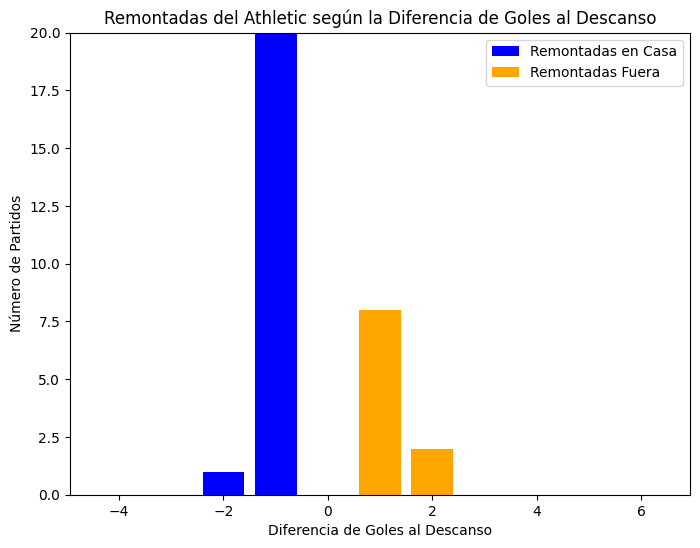

In [40]:
# Filtrar solo los partidos del Athletic
athletic_data = data[(data["HomeTeam"] == "Athletic") | (data["AwayTeam"] == "Athletic")]


# # # Remontadas en casa: Athletic es local, pierde al descanso (A) y gana al final (H)
athletic_data["Remontada_Casa"] = (athletic_data["HomeTeam"] == "Athletic") & \
                                  (athletic_data["ResultadoDescanso"] == "A") & \
                                  (athletic_data["Ganador"] == "H")

# # # Remontadas fuera: Athletic es visitante, pierde al descanso (H) y gana al final (A)
athletic_data["Remontada_Fuera"] = (athletic_data["AwayTeam"] == "Athletic") & \
                                   (athletic_data["ResultadoDescanso"] == "H") & \
                                   (athletic_data["Ganador"] == "A")


# # # Contamos remontadas en casa y fuera según la diferencia de goles al descanso
grouped_casa = athletic_data.groupby("DifGolesDesc")["Remontada_Casa"].sum()
grouped_fuera = athletic_data.groupby("DifGolesDesc")["Remontada_Fuera"].sum()

# # # Gráfico
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped_casa.index, grouped_casa, color='blue', label='Remontadas en Casa')
ax.bar(grouped_fuera.index, grouped_fuera, bottom=grouped_casa, color='orange', label='Remontadas Fuera')

ax.set_xlabel('Diferencia de Goles al Descanso')
ax.set_ylabel('Número de Partidos')
ax.set_title('Remontadas del Athletic según la Diferencia de Goles al Descanso')
ax.legend()
plt.show()

In [41]:
# # Filtrar solo los partidos del Athletic
# athletic_data = data[(data["HomeTeam"] == "Athletic") | (data["AwayTeam"] == "Athletic")]

# # Remontadas en casa: Athletic es local, perdía al descanso (A) y ganó al final (H)
# athletic_data["Remontada_Casa"] = (athletic_data["HomeTeam"] == "Athletic") & \
#                                   (athletic_data["ResultadoDescanso"] == "A") & \
#                                   (athletic_data["Ganador"] == "H") & \
#                                   (athletic_data["DifGolesDesc"] < 0)  # Asegurar que iba perdiendo

# # Remontadas fuera: Athletic es visitante, perdía al descanso (H) y ganó al final (A)
# athletic_data["Remontada_Fuera"] = (athletic_data["AwayTeam"] == "Athletic") & \
#                                    (athletic_data["ResultadoDescanso"] == "H") & \
#                                    (athletic_data["Ganador"] == "A") & \
#                                    (athletic_data["DifGolesDesc"] < 0)  # Asegurar que iba perdiendo

# # Filtrar solo partidos donde realmente hubo remontada
# athletic_data = athletic_data[(athletic_data["Remontada_Casa"]) | (athletic_data["Remontada_Fuera"])]

# # Contamos remontadas en casa y fuera según la diferencia de goles al descanso
# grouped_casa = athletic_data.groupby("DifGolesDesc")["Remontada_Casa"].sum()
# grouped_fuera = athletic_data.groupby("DifGolesDesc")["Remontada_Fuera"].sum()

# # Gráfico
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.bar(grouped_casa.index, grouped_casa, color='blue', label='Remontadas en Casa')
# ax.bar(grouped_fuera.index, grouped_fuera, bottom=grouped_casa, color='orange', label='Remontadas Fuera')

# ax.set_xlabel('Diferencia de Goles al Descanso')
# ax.set_ylabel('Número de Partidos')
# ax.set_title('Remontadas del Athletic según la Diferencia de Goles al Descanso')
# ax.legend()
# plt.show()


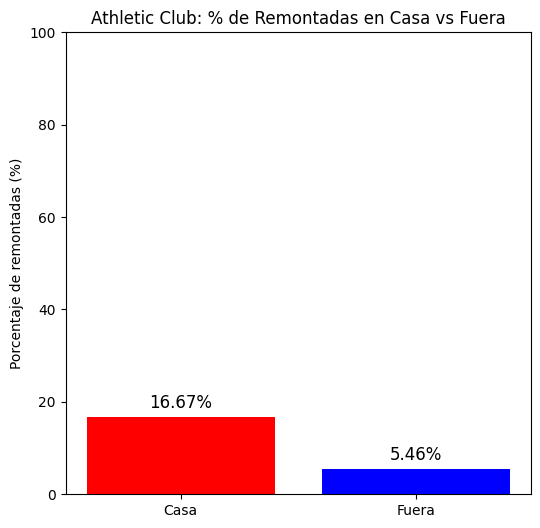

In [42]:
# Filtrar solo el Athletic
athletic_stats = team_global_stats.loc["Athletic"]

total_casa = athletic_stats['Total_Remontada_Casa_Rate']
total_fuera = athletic_stats['Total_Remontada_Fuera_Rate']

# Crear gráfico de barras
plt.figure(figsize=(6, 6))
plt.bar(["Casa", "Fuera"], [total_casa, total_fuera], color=["red", "blue"])
plt.ylabel("Porcentaje de remontadas (%)")
plt.title("Athletic Club: % de Remontadas en Casa vs Fuera")
plt.ylim(0, 100)

# Añadir valores sobre las barras
for i, v in enumerate([total_casa, total_fuera]):
    plt.text(i, v + 2, f"{v}%", ha='center', fontsize=12)

plt.show()

In [43]:
# athletic_data = data[(data['HomeTeam'] == 'Atletic') | (data['AwayTeam'] == 'Athletic')]
partidos_ath.groupby('Season')[['GolesLocal', 'GolesVisitante']].sum()

,GolesLocal,GolesVisitante
Season,,
1995-96,62,37
1996-97,76,53
1997-98,61,33
1998-99,60,40
1999-2000,60,44
2000-01,67,37
2001-02,60,60
2002-03,71,53
2003-04,61,41


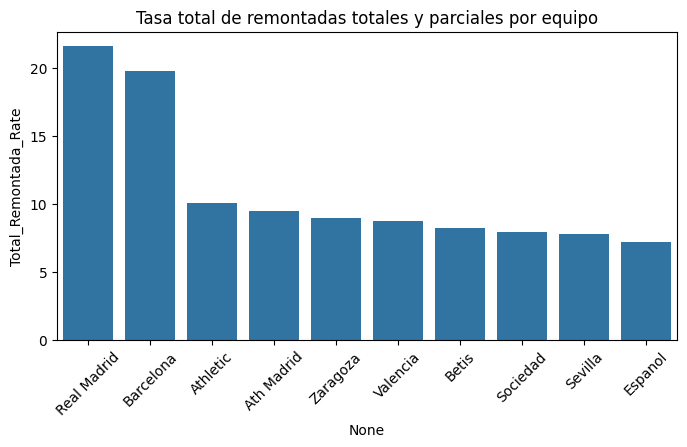

In [44]:
plt.figure(figsize=(8,4))
sns.barplot(x=team_global_stats.index, y='Total_Remontada_Rate', data=team_global_stats)
plt.title("Tasa total de remontadas totales y parciales por equipo")
plt.xticks(rotation=45)
plt.show()

## 7. Analisis

In [45]:
goals_season = data.groupby("Season")["GolesPartido"].sum()

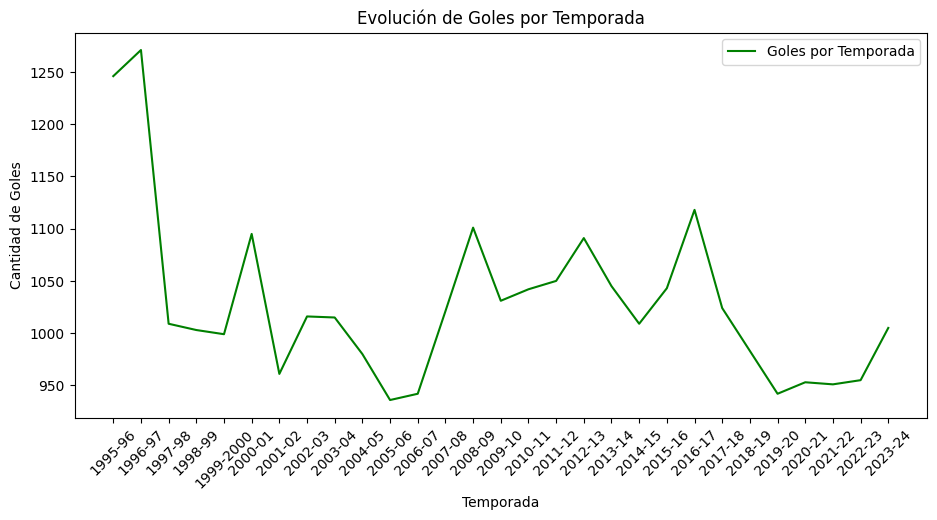

In [46]:
plt.figure(figsize=(11, 5))
plt.plot(goals_season.index, 
         goals_season.values, 
         linestyle='-', 
         color='green', 
         label='Goles por Temporada',
         )

plt.xticks(goals_season.index)
plt.xticks(rotation=45)
plt.xlabel('Temporada')
plt.ylabel('Cantidad de Goles')
plt.title('Evolución de Goles por Temporada')
plt.legend()

plt.show()
